In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = sns.load_dataset('titanic')


In [ ]:
print("Head of dataset:")
print(df.head())

Head of dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns


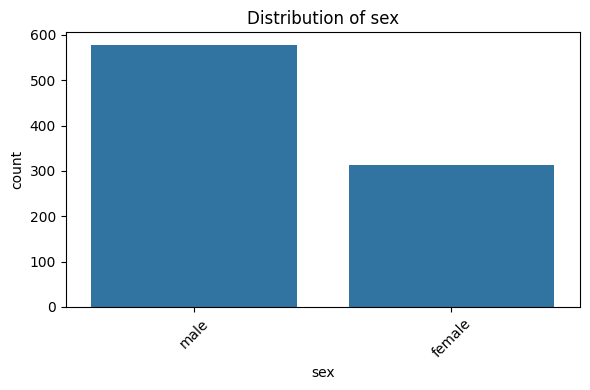

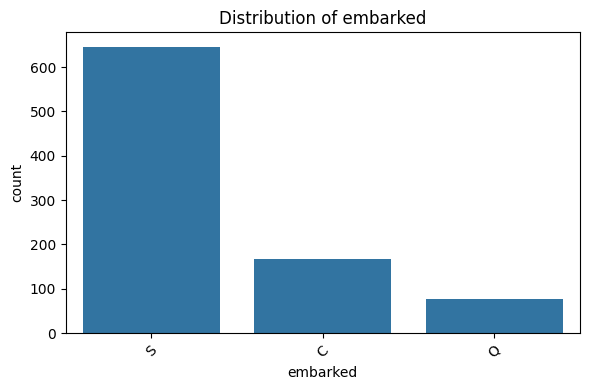

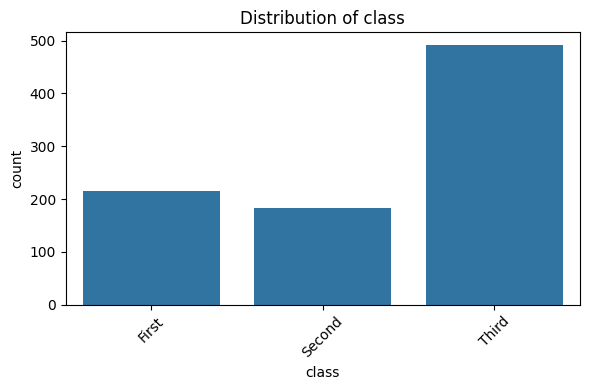

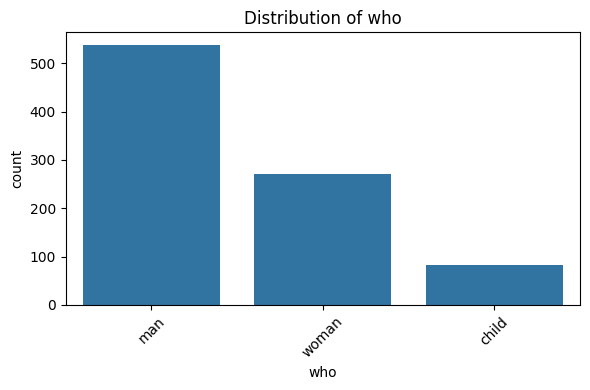

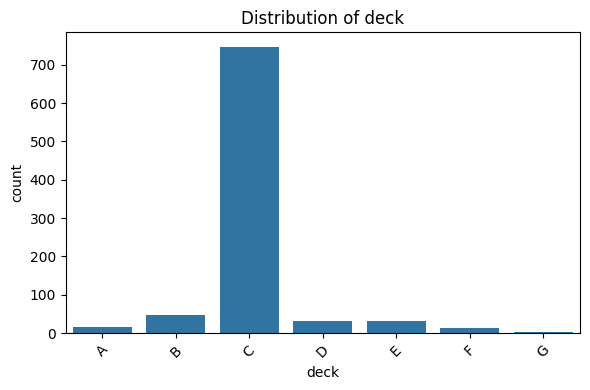

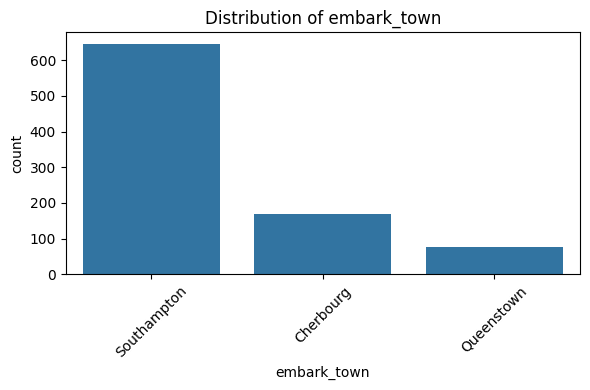

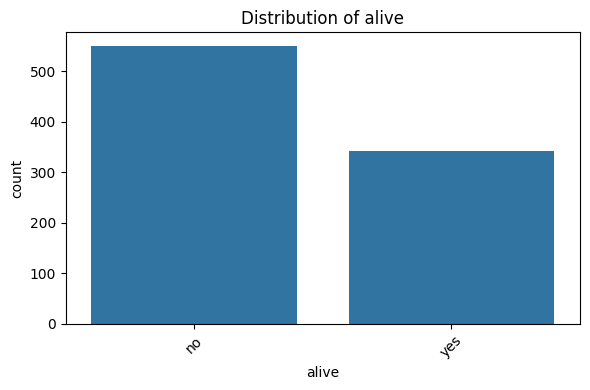

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

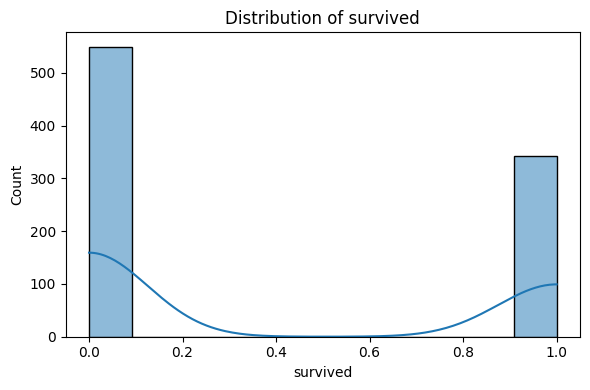

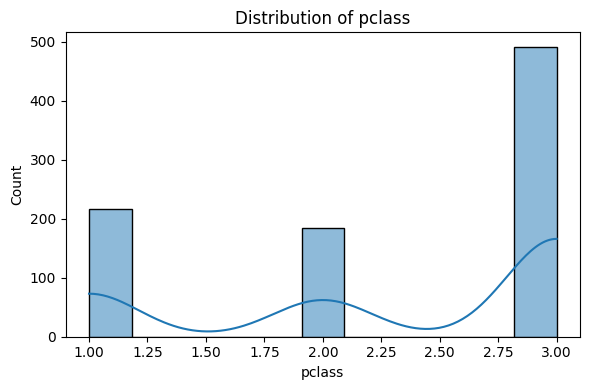

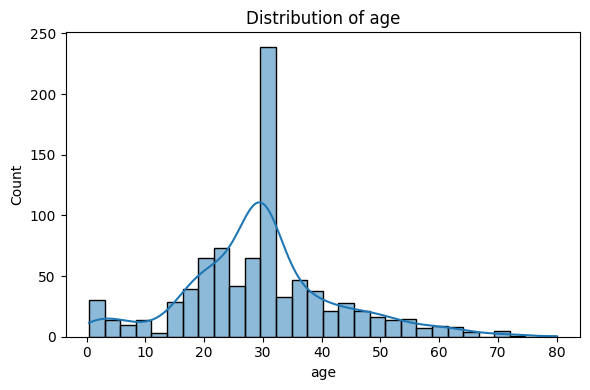

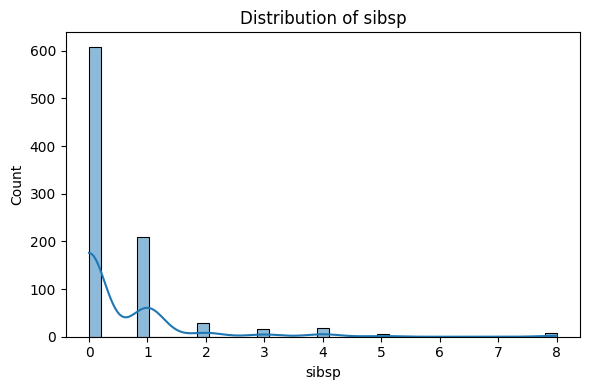

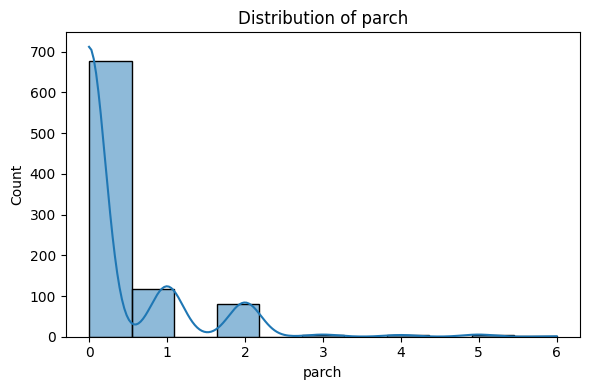

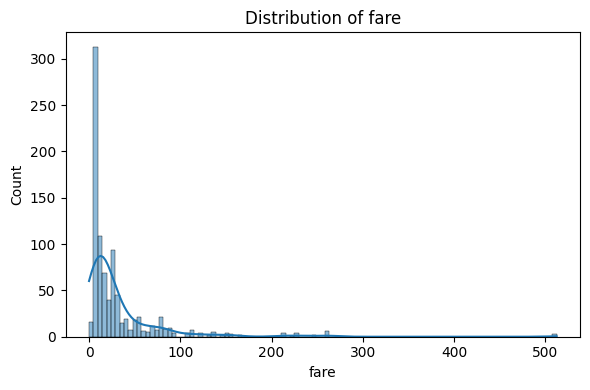

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [ ]:
correlation_matrix = df[num_cols].corr()

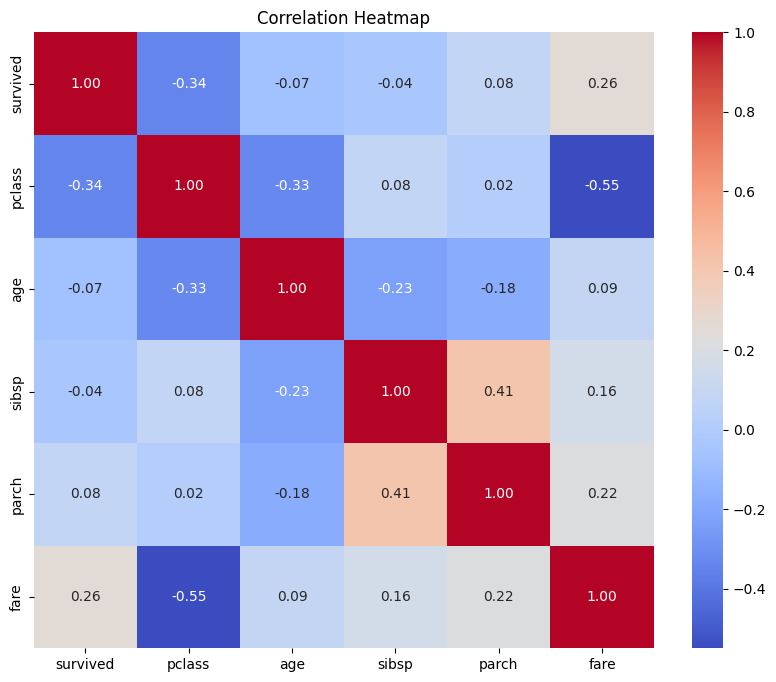

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
le = LabelEncoder()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

In [ ]:
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
multi_cat_cols = [col for col in cat_cols if df[col].nunique() > 2]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
print("\nFinal processed dataset:")
print(df.head())


Final processed dataset:
   survived    pclass  sex       age     sibsp     parch      fare  \
0 -0.789272  0.827377    1 -0.592481  0.432793 -0.473674 -0.502445   
1  1.266990 -1.566107    0  0.638789  0.432793 -0.473674  0.786845   
2  1.266990  0.827377    0 -0.284663 -0.474545 -0.473674 -0.488854   
3  1.266990 -1.566107    0  0.407926  0.432793 -0.473674  0.420730   
4 -0.789272  0.827377    1  0.407926 -0.474545 -0.473674 -0.486337   

   adult_male  alive  alone  ...  who_man  who_woman  deck_B  deck_C  deck_D  \
0        True      0  False  ...     True      False   False    True   False   
1       False      1  False  ...    False       True   False    True   False   
2       False      1   True  ...    False       True   False    True   False   
3       False      1  False  ...    False       True   False    True   False   
4        True      0   True  ...     True      False   False    True   False   

   deck_E  deck_F  deck_G  embark_town_Queenstown  embark_town_Southampt